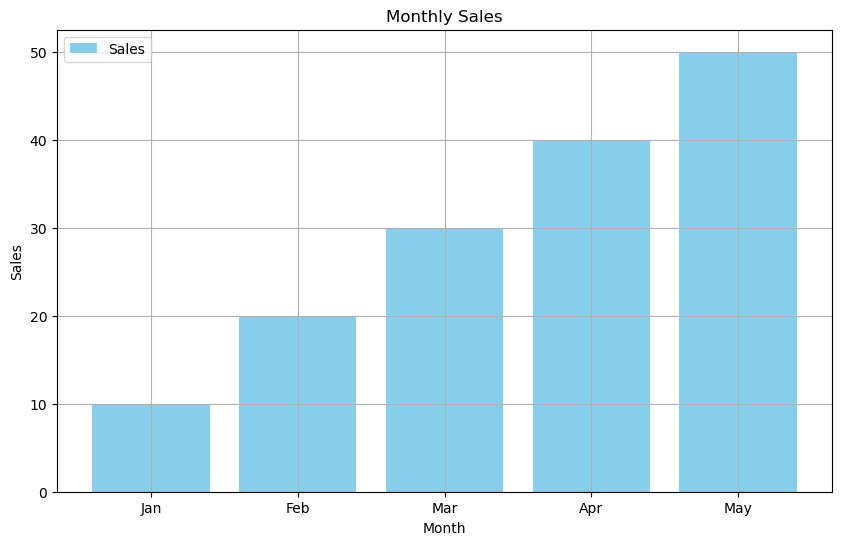

In [151]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

months = ['Jan','Feb','Mar','Apr','May']
sales = [10,20,30,40,50]

plt.figure(figsize=(10,6))
plt.bar(months, sales, color='skyblue', label='Sales')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

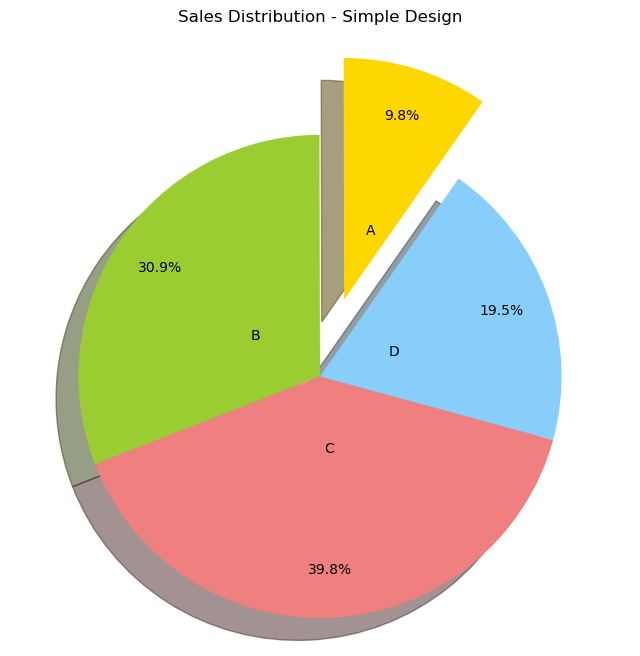

In [3]:
labels = ['A','B','C','D']
sizes = [12, 38, 49, 24]
colors = ['gold','yellowgreen','lightcoral','lightskyblue']
explode = (0.1,0,0,0)

plt.figure(figsize=(8,8))
plt.pie(sizes, radius=0.3, explode = explode, shadow=True, 
        labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=55, pctdistance=.8, labeldistance=.3)
plt.title('Sales Distribution - Simple Design')
plt.axis('equal')
plt.show()

## 실습 과제 (Weather Classification Dataset)

In [31]:
# 데이터 확인하기
df = pd.read_csv('weather_classification_data.csv')
print(df.head())
print('-'*80)
print(df.info())

   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  
--------------------

In [33]:
# 수치형과 범주형 변수 구분하기
numerical = df.select_dtypes(include=['float64','int64']).columns
categorical = df.select_dtypes(include=['object']).columns
print(numerical)
print(categorical)

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')
Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')


                      Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature              1.000000 -0.207969   -0.070022          -0.287206   
Humidity                -0.207969  1.000000    0.406079           0.638631   
Wind Speed              -0.070022  0.406079    1.000000           0.443770   
Precipitation (%)       -0.287206  0.638631    0.443770           1.000000   
Atmospheric Pressure     0.209188 -0.120653   -0.077757          -0.177444   
UV Index                 0.374773 -0.342694   -0.068147          -0.291601   
Visibility (km)          0.250751 -0.479969   -0.311828          -0.457444   

                      Atmospheric Pressure  UV Index  Visibility (km)  
Temperature                       0.209188  0.374773         0.250751  
Humidity                         -0.120653 -0.342694        -0.479969  
Wind Speed                       -0.077757 -0.068147        -0.311828  
Precipitation (%)                -0.177444 -0.291601        -0.457444  
Atmospheric Pre

<Axes: >

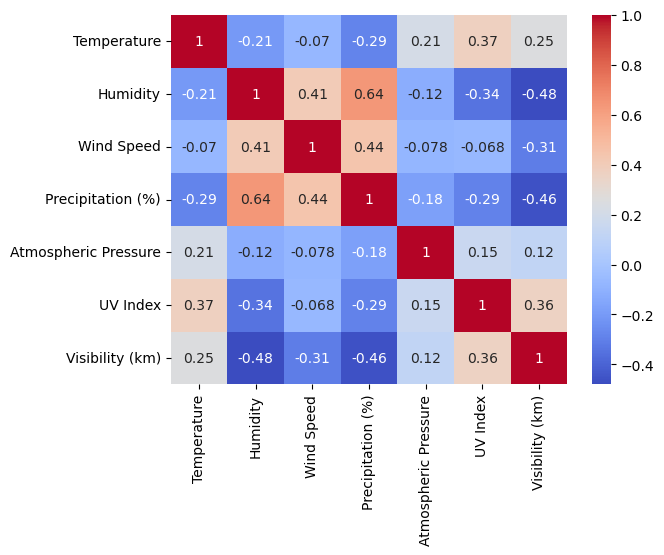

In [35]:
# 상관관계 찾기
matrix = df[numerical].corr()
print(matrix)
sns.heatmap(matrix, annot=True, cmap='coolwarm')

In [37]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


x축에 들어갈 값: Index(['coastal', 'inland', 'mountain'], dtype='object', name='Location')
y축에 들어갈 값: [47.66339961 56.14534884 55.57947226]


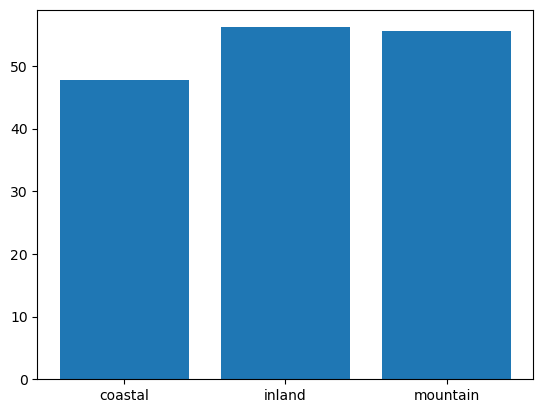

In [39]:
# 막대그래프
loc_rain = df.groupby('Location')['Precipitation (%)'].agg(lambda x: x.mean())

print(f"x축에 들어갈 값: {loc_rain.index}")
print(f"y축에 들어갈 값: {loc_rain.values}")

plt.bar(loc_rain.index,loc_rain.values)
plt.show()


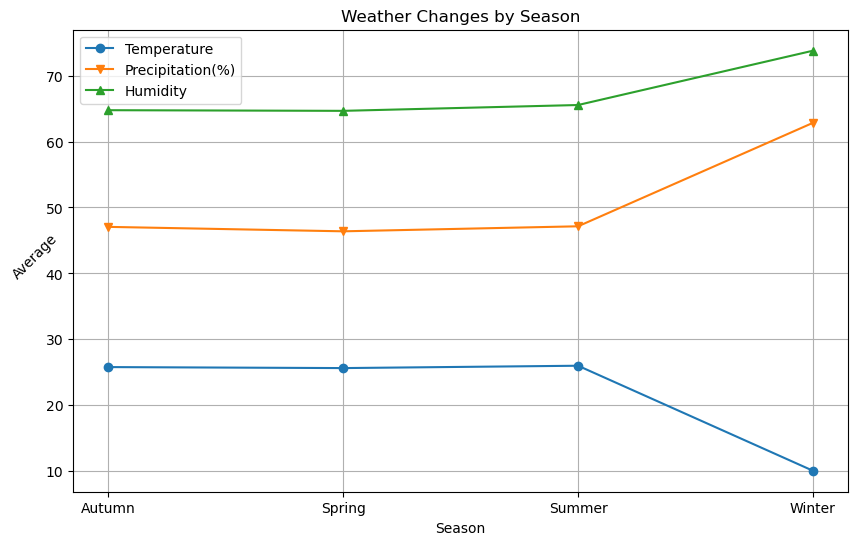

In [95]:
# 선 그래프 / 복합 차트
season_avg_temp = df.groupby('Season')['Temperature'].mean()
season_avg_prec = df.groupby('Season')['Precipitation (%)'].mean()
season_avg_hum = df.groupby('Season')['Humidity'].mean()

# print(season_avg_temp.index)
# print(season_avg_temp.values)
plt.figure(figsize=(10,6))
plt.plot(season_avg_temp.index,season_avg_temp.values,marker='o',label='Temperature')
plt.plot(season_avg_prec.index,season_avg_prec.values,marker='v',label='Precipitation(%)')
plt.plot(season_avg_hum.index,season_avg_hum.values,marker='^',label='Humidity')
plt.grid(True)
plt.title('Weather Changes by Season')
plt.legend()
plt.xlabel('Season')
plt.ylabel('Average',rotation=45)
plt.show()

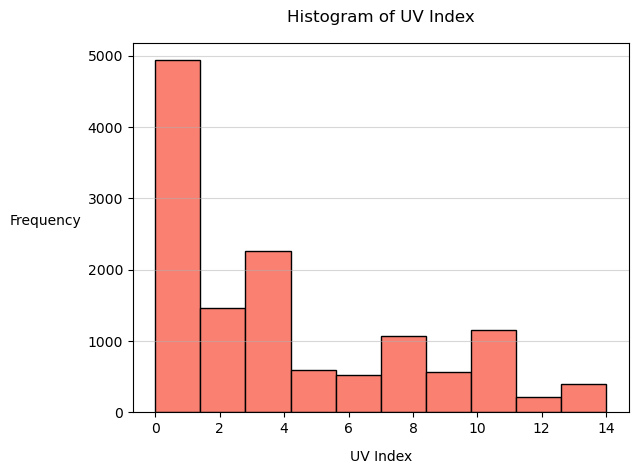

In [141]:
# 히스토그램
plt.figure()
plt.hist(df['UV Index'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of UV Index',pad=15)
plt.xlabel('UV Index', labelpad=10)
plt.ylabel('Frequency',rotation=0, labelpad=30)
plt.grid(axis='y',alpha=0.5)
plt.show()

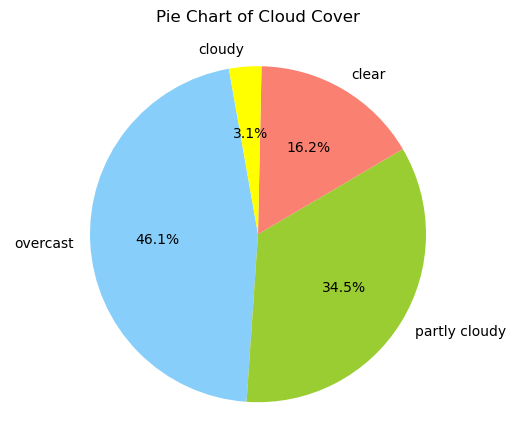

In [225]:
# 파이차트 

cc_count = df['Cloud Cover'].value_counts()
sizes = cc_count.values
# print(sizes)
labels = ['overcast','partly cloudy', 'clear', 'cloudy']
colors = ['lightskyblue','yellowgreen','salmon','yellow']

plt.figure()
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=100)
plt.title('Pie Chart of Cloud Cover', pad=20)
plt.axis('equal')
plt.show()


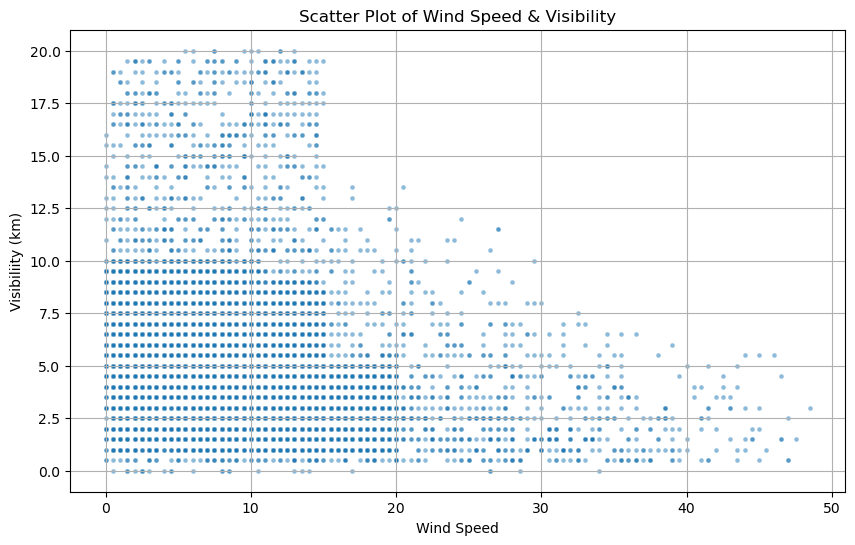

'\n풍속과 가시거리 사이에는 부정적인 상관관계가 존재한다. 풍속이 증가할수록 가시거리가 감소하는 경향이 있다.\n높은 풍속은 먼지, 모래 입자 등을 퍼뜨리거나, 눈보라나 안개 및 비를 동반할 수 있으며, 이것들은 가시거리에 영향을 줄 수 있는 몇 가지 요인들이다.\n'

In [227]:
# 산점도
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.scatterplot(x='Wind Speed', y='Visibility (km)', data=df, alpha=0.5, s=12)
plt.title('Scatter Plot of Wind Speed & Visibility')  # 제목 추가
plt.xlabel('Wind Speed')  # x축 레이블 추가
plt.ylabel('Visibiliity (km)')  # y축 레이블 추가
plt.grid(True)  # 그리드 추가
plt.show()

'''
풍속과 가시거리 사이에는 부정적인 상관관계가 존재한다. 풍속이 증가할수록 가시거리가 감소하는 경향이 있다.
높은 풍속은 먼지, 모래 입자 등을 퍼뜨리거나, 눈보라나 안개 및 비를 동반할 수 있으며, 이것들은 가시거리에 영향을 줄 수 있는 몇 가지 요인들이다.
'''

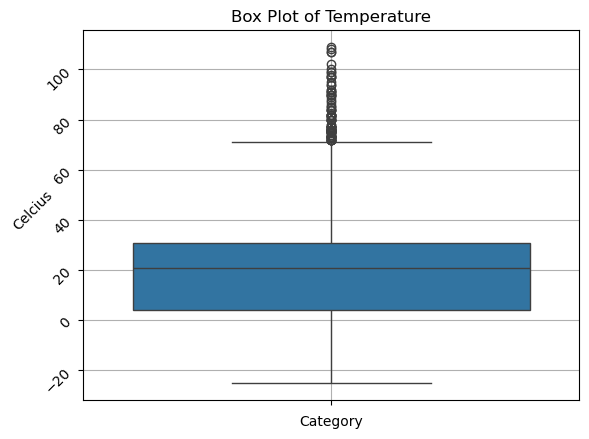

In [229]:
# 박스플롯
plt.figure()
sns.boxplot(y=df['Temperature'])
plt.title('Box Plot of Temperature')
plt.xlabel('Category')
plt.ylabel('Celcius',rotation=45)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True)
plt.show()

In [231]:
df['Season'].head(20)

0     Winter
1     Spring
2     Spring
3     Spring
4     Winter
5     Summer
6     Winter
7     Winter
8     Winter
9     Winter
10    Spring
11    Autumn
12    Autumn
13    Winter
14    Winter
15    Summer
16    Spring
17    Autumn
18    Spring
19    Summer
Name: Season, dtype: object

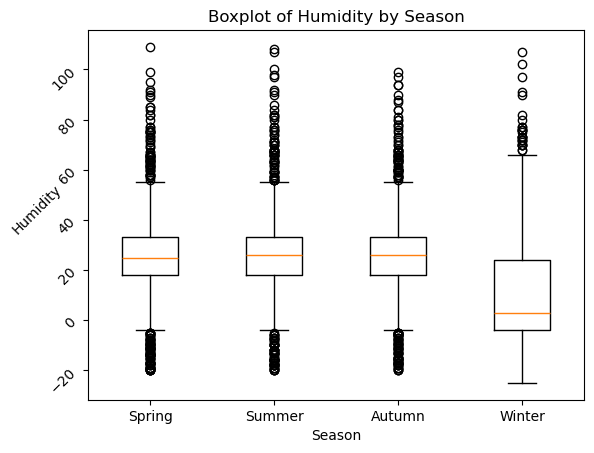

In [233]:
# 이변량 박스플롯 그리기
box = plt.figure()
ax = box.add_subplot(1,1,1)
labels = ['Spring','Summer','Autumn','Winter']
ax.boxplot(
    [df[df['Season']=='Spring']['Temperature'],
     df[df['Season']=='Summer']['Temperature'],
     df[df['Season']=='Autumn']['Temperature'],
     df[df['Season']=='Winter']['Temperature']],
    labels = labels
     )
ax.set_title('Boxplot of Humidity by Season')
plt.xlabel('Season')
plt.ylabel('Humidity',rotation=45)
plt.yticks(rotation=45)
plt.show()